In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from matplotlib import rcParams
import matplotlib.font_manager as fm
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5

In [31]:
import sys
import os
import pandas as pd
import numpy as np
from os.path import join as pjoin

from catrace.stats import sort_conditions, pool_training_conditions
from catrace.visualize import plot_measure, plot_all_measures

paper_fig_dir = '/tungstenfs/scratch/gfriedri/hubo/Dp_manifold/figures_for_paper/juvenile/capacity'

In [32]:
measure_names = ['capacity', 'radius', 'dimension', 'axes_alignment', 'center_alignment', 'center_axes_alignment']
align_measure_names = ['axes_alignment', 'center_alignment', 'center_axes_alignment']


In [33]:
def load_juvenile_capacities(jobname, analysis_dir):
    jobfile = pjoin(analysis_dir, f'df_result.pkl')
    df_result = pd.read_pickle(jobfile)
    df_per_fish_juv = df_result.xs(False, level='shuffle').groupby(['fish_id', 'condition', 'odor1', 'odor2'], sort=False).mean()
    df_per_fish_juv_shuffled = df_result.xs(True, level='shuffle').groupby(['fish_id', 'condition', 'odor1', 'odor2'], sort=False).mean()

    juv_conditions =  ['naive', 'arg-phe', 'phe-arg', 'phe-trp']
    cond_mapping = {'naive': 'naive', 'phe-arg': 'trained', 'arg-phe': 'trained', 'phe-trp': 'trained'}
    conditions_pooled = ['naive', 'trained']

    df_pooled = pool_training_conditions(df_per_fish_juv, cond_mapping, keep_subconditions=True)

    df_pooled_shuffled = pool_training_conditions(df_per_fish_juv_shuffled, cond_mapping, keep_subconditions=True)
    return df_per_fish_juv, df_per_fish_juv_shuffled,df_pooled, df_pooled_shuffled, juv_conditions, cond_mapping, conditions_pooled


## Juvenile

In [34]:
import sys
import os
import pandas as pd
from os.path import join as pjoin

from catrace.dataset import DatasetConfig
from catrace.utils import load_config

from catrace.dataset import load_dataset_config
from catrace.for_paper import save_figure_for_paper
window = [32, 85]
seed = 8787
window_key = f'window_{window[0]}_{window[1]}'
N=700 # Number of neurons
M = 140 # Number of activity patterns per manifold

dsconfig= load_dataset_config(f'../juvenile_dataset_without14mm_phearg.json')
capacity_dir = '/tungstenfs/scratch/gfriedri/hubo/Dp_manifold/juvenile_dataset/results/capacity'

jobname = f'capacity_sweep_{window_key}_N{N}_M{M}_master_seed{seed}'
# Load the capacity dataframe
import pandas as pd

input_dir = pjoin(capacity_dir, jobname)
exp_list = dsconfig.exp_list
conditions = dsconfig.conditions


df_per_fish_juv, df_per_fish_juv_shuffled,df_pooled, df_pooled_shuffled, juv_conditions, cond_mapping, conditions_pooled = load_juvenile_capacities('', input_dir)

### Learned AA vs novel AA

arg-phe
[('Arg', 'Phe')]
[('Phe', 'Trp')]
[('Arg', 'Trp')]


/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(
/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(
/tmp/ipykernel_4153942/2138136699.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels)


phe-arg
[('Arg', 'Phe')]
[('Phe', 'Trp')]
[('Arg', 'Trp')]


/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(
/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(
/tmp/ipykernel_4153942/2138136699.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels)


phe-trp
[('Arg', 'Phe')]
[('Phe', 'Trp')]
[('Arg', 'Trp')]


/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(
/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(
/tmp/ipykernel_4153942/2138136699.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels)


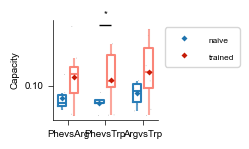

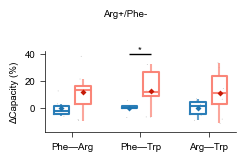

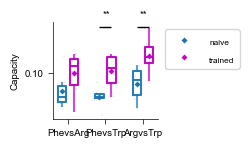

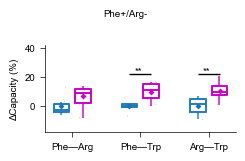

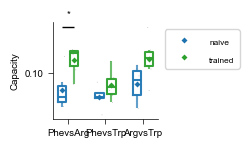

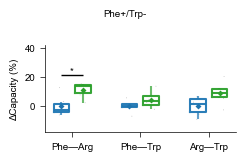

In [35]:
def compute_vsdff_percent(vsdff):
    vsdff_percent = vsdff.copy()
    # for each vsname, compute the mean of the naive condition
    for vsname, group in vsdff_percent.groupby('vsname'):
        naive_mean = group.xs('naive', level='condition').mean()
        # Divide all values by the naive mean
        vsdff_percent.loc[group.index] = (group - naive_mean)/ naive_mean * 100
    return vsdff_percent

def get_group_vs_group(dff, odor1_group, odor2_group):
    # Get  tuples of (odor1, odor2) that are in the group
    odor_tuples = [(odor1, odor2) for odor1 in odor1_group for odor2 in odor2_group]
    # Remove the tuples that has same odor1 and odor2
    odor_tuples = [odor_tuple for odor_tuple in odor_tuples if odor_tuple[0] != odor_tuple[1]]
    # The order of odor1 and odor2 does not matter, so we only need to keep one of them
    odor_tuples = list({tuple(sorted(odor_tuple)) for odor_tuple in odor_tuples})
    print(odor_tuples)

    # dff has more index levels than just odor1 and odor2
    # Extract the 'odor1' and 'odor2' index levels from dff
    idx_df = dff.index.to_frame(index=False)
    
    # Create a mask by checking if each (odor1, odor2) in the index is in odor_tuples
    mask = idx_df[['odor1', 'odor2']].apply(
        lambda x: tuple((x['odor1'], x['odor2'])) in odor_tuples, axis=1
    )

    # Use the mask to filter the original DataFrame
    gvg = dff[mask.values]
    return gvg

def get_per_vs(vsdict, dff):
    vsdffs = {}
    for vsname, (odor1_group, odor2_group) in vsdict.items():
        dff_vs = get_group_vs_group(dff, odor1_group, odor2_group)
        vsdffs[vsname] = dff_vs
    vsdff = pd.concat(vsdffs.values(), keys=vsdffs.keys(), names=['vsname'])
    return vsdff

def select_condition_multi_vs(selected_conditions, perc_ylim=None, second_box_color='tab:orange'):
    # selected_conditions should be of length 2 and the fist element should be 'naive'
    assert len(selected_conditions) == 2
    assert selected_conditions[0] == 'naive'

    df_pooled_sel = df_pooled[df_pooled.index.get_level_values('subcondition').isin(selected_conditions)]
    df_pooled_sel_shuffled = df_pooled_shuffled[df_pooled_shuffled.index.get_level_values('subcondition').isin(selected_conditions)]
    selected_conditions_tag = selected_conditions[1]
    print(selected_conditions_tag)
    dataset_name = 'juvenile'


    vsdict = {
        'PhevsArg': (['Phe'], ['Arg']),
        'PhevsTrp': (['Phe'], ['Trp']),
        'ArgvsTrp': (['Arg'], ['Trp']),
    }

    vsdff = get_per_vs(vsdict, df_pooled_sel)

    from catrace.visualize import (plot_measure_multi_odor_cond,
                                PlotBoxplotMultiOdorCondParams,
                                set_yticks_interval)
    plot_box_multi_params = PlotBoxplotMultiOdorCondParams(
            figsize=(2.6, 1.6),
            label_fontsize=7,
            strip_size=0.5,
            mean_marker_size=1,
            pvalue_marker_xoffset=0.05,
            do_capitalize_labels=True,
            show_ns=False,
            hue_colors=['tab:blue', second_box_color]
        )
    fig, ax, test_results = plot_measure_multi_odor_cond(vsdff, 'capacity', odor_name='vsname', condition_name='condition', params=plot_box_multi_params)

    set_yticks_interval(ax, 0.05)

    vsdff_percent = compute_vsdff_percent(vsdff)
    fig_percent, ax, test_results_percent = plot_measure_multi_odor_cond(vsdff_percent, 'capacity', odor_name='vsname', condition_name='condition', params=plot_box_multi_params)

    figname = f'{dataset_name}_AA_{selected_conditions_tag}_capacity_vsname'
    save_figure_for_paper(fig, figname, paper_fig_dir)
    figname_percent = f'{dataset_name}_AA_{selected_conditions_tag}_capacity_vsname_percent'

    ax = fig_percent.get_axes()[0]
    ax.set_ylabel('ΔCapacity (%)')

    if perc_ylim is not None:
        ax.set_ylim(perc_ylim)

    xtick_labels = ax.get_xticklabels()
    mapping = {'PhevsArg': 'Phe—Arg', 'PhevsTrp': 'Phe—Trp', 'ArgvsTrp': 'Arg—Trp'}
    xtick_labels = [mapping[label.get_text()] for label in xtick_labels]
    ax.set_xticklabels(xtick_labels)

    if ax.get_legend():
        ax.get_legend().remove()

    plus_minus = selected_conditions_tag.split('-')
    # Capitalize plus_minus
    plus_minus = [pm.capitalize() for pm in plus_minus]
    condition_text = f'{plus_minus[0]}+/{plus_minus[1]}-'
    fig_percent.suptitle(condition_text, fontsize=7)
    fig_percent.tight_layout()

    save_figure_for_paper(fig_percent, figname_percent, paper_fig_dir)
    # save_stats_json(test_results, figname, paper_fig_dir, tuple_key_to_str=True)

    return vsdff, vsdff_percent, test_results_percent


trained_conditions = ['arg-phe', 'phe-arg', 'phe-trp']

vsdffs = {}
vsdff_percents = {}
test_results_percents = {}

perc_ylim = (-18, 42)
condition_color_mapping = {'naive': 'tab:blue', 
              'arg-phe': 'salmon',
              'phe-arg': 'm',
              'phe-trp': 'tab:green',
}
for trained_condition in trained_conditions:
    vsdff, vsdff_percent,test_results_percent = select_condition_multi_vs(['naive', trained_condition], perc_ylim=perc_ylim, second_box_color=condition_color_mapping[trained_condition])
    vsdffs[trained_condition] = vsdff
    vsdff_percents[trained_condition] = vsdff_percent
    test_results_percents[trained_condition] = test_results_percent


In [36]:
from catrace.stats import format_test_results_multi_odor_two_cond
for condition in trained_conditions:
    print(condition)
    sentence = format_test_results_multi_odor_two_cond(test_results_percents[condition])
    print(sentence)

arg-phe
For ArgvsTrp, Comparing naive (mean = 0.0000000000000001480 ± 6.266, n = 6) vs trained (mean = 11.40 ± 15.81, n = 9): Mann–Whitney U test, U = 14.00, P = 0.145. For PhevsArg, Comparing naive (mean = 0.00000000000001984 ± 6.940, n = 6) vs trained (mean = 11.55 ± 14.91, n = 9): Mann–Whitney U test, U = 14.00, P = 0.145. For PhevsTrp, Comparing naive (mean = -0.0000000000000001110 ± 4.068, n = 6) vs trained (mean = 12.72 ± 13.96, n = 9): Mann–Whitney U test, U = 10.00, P = 0.050.
phe-arg
For ArgvsTrp, Comparing naive (mean = 0.0000000000000001480 ± 6.266, n = 6) vs trained (mean = 10.19 ± 5.491, n = 10): Mann–Whitney U test, U = 5.00, P = 0.005. For PhevsArg, Comparing naive (mean = 0.00000000000001984 ± 6.940, n = 6) vs trained (mean = 6.661 ± 7.321, n = 10): Mann–Whitney U test, U = 15.00, P = 0.118. For PhevsTrp, Comparing naive (mean = -0.0000000000000001110 ± 4.068, n = 6) vs trained (mean = 9.870 ± 6.129, n = 10): Mann–Whitney U test, U = 6.00, P = 0.007.
phe-trp
For ArgvsTr